# **Final Project: "Computer Vision"**
Author: Aqsa Hassan

Submitted to: Professor Nicholas 


$\color{green}{\text{Abstract of Project:}}$
This work is divided into two notebooks, first notebook contains the baseline models and experiments to improve that model using different techniques such as data augmentation, increasing filters and layers, dropout, batch normalization and early stopping were investigated. Besides, optimization methods namely learning rate adaptive reduction is also applied to train these neural networks to avoid overfitting. In second notebook, I have used transfer learing methods to improve the model performance on Cifar100 dataset.



Note: You might notice that I have imported and defined a few libraries and functions again in the notebook. The reason for that was that my notebook was disconnecting frequently and it was easy for me to have those lines of codes replicated to a nearer cell rather than roaming across the whole notebook.

#Summary of the first part of project:

---

In this part of project, first I did data expolaration to get the idea of what kind of dataset I am using for image classification task and also did the required preprocesssing of the dataset. Later, I bulit various CNN models with different combination showing benefits of following techniques:


1. Built a simple baseline model
2. Increased filters and convolution layers in baseline CNN.
3. Taking advantages of standard data augmentation.
4. Applying Cutout/ Random Erasing
5. Taking advantages of learning rate adaptive reduction.
6. Taking advantages of Early stopping
7. Adding Dropout layers.
8. Adding batch normalization layers
9. Finally the best simple model is created using above mentioned techniques

Results:
**After trying out different combinations, the best simple CNN model in Keras without transfer learning achieves 65.16% accuracy on test set of CIFAR-100 which is close to ResNet50.**

In [ ]:
# Import datasets & libraries
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
import keras

## 1 Dataset: Cifar10 and Cifar100
The CIFAR-10 and CIFAR-100 are subsets of 80 million small images that have been labeled. There are 60000 32x32 color images in both datasets. CIFAR-10 has ten classes, each with 6000 images, whereas CIFAR-100 has one hundred classes, each with 600 images.

Here I am using Cifar100 dataset 

##1. Exploring the CIFAR-100 Dataset

In [ ]:
# Download dataset of CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Check the shape of the array
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of samples in dataset
print(f"Number of samples in Train: {x_train.shape[0]}")
print(f" Number of samples in Test: {x_test.shape[0]}")

# Data format
print(f"Data format: {type(x_train)}")
print(f"Data format: {type(y_train)}")

169017344/169001437 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Number of samples in Train: 50000
 Number of samples in Test: 10000
Data format: <class 'numpy.ndarray'>
Data format: <class 'numpy.ndarray'>


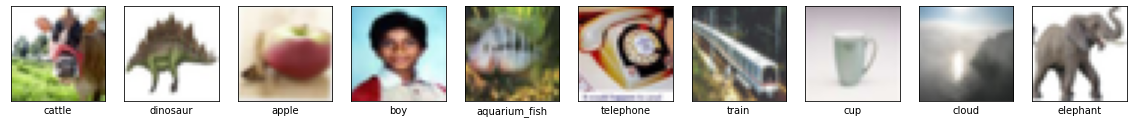

In [ ]:
# Dataset class labels
labels =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
           'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
           'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
           'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
           'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
           'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
           'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
           'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']


# Visualize several images and their classes from the training set
# Visualize several images and their classes from the training set
plt.figure(figsize=(20, 3))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap="gray")
    plt.xlabel(labels[y_train[i].astype(int)[0]])
    
plt.show()

    


Visualizing the number of images in each class

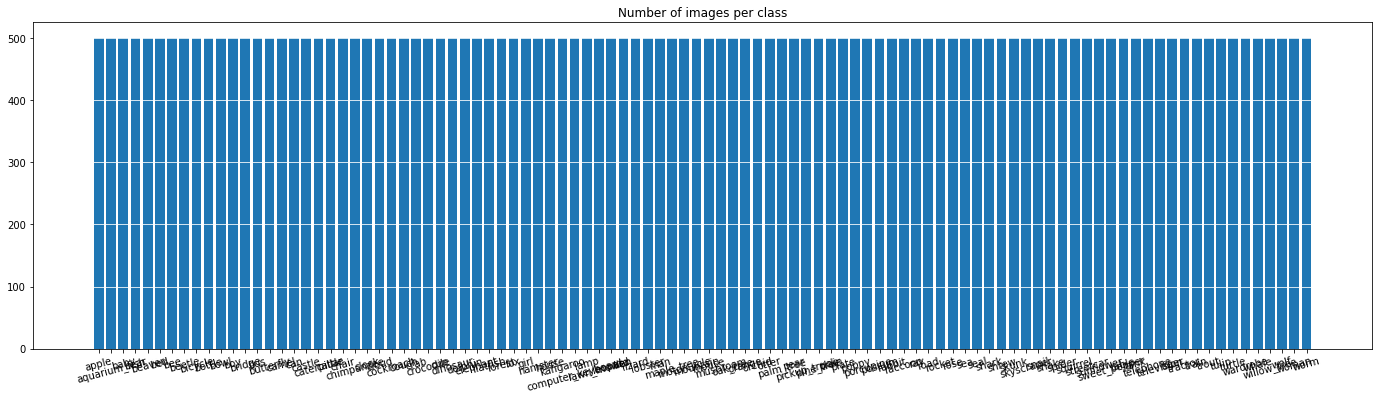

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
ticks = np.arange(len(counts))
plt.figure(figsize=(24,6))
plt.grid(color='w', axis='y')
plt.bar(ticks, counts)
plt.xticks(ticks, labels, rotation=15)
plt.title('Number of images per class')
plt.show()

We can see that the dataset is more or less balanced – there aren't any classes that have substantially more or fewer examples than others. Obtaining a high classification accuracy on CIFAR-100 is a challenging task because there are many classes but the number of training samples for each class is very small. In particular, the dataset comprises only 500 training images and 100 testing images per class. It is also interesting to note that the images are of low quality and in some images, only parts of the object are shown e.g. only head or only body.

## 2 Preprocessing for CIFAR-100 dataset

In [ ]:
# Import libraries for preprocessing images
from tensorflow.keras.utils import to_categorical

# Normalize images
train_images = x_train.astype('float32')/255
test_images = x_test.astype('float32')/255

# Transform labels to one hot encoding
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)



In [ ]:
# Plot function for visualisation training process
import matplotlib.pyplot as plt

def training_plot(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'b', label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

## 3 Build CNN models for classification task
Before using advance techniques such as data augmentation and transfer learning, I build a very simple model as my baseline CNN to estimate the difficulty of classifying Cifar100 dataset images. 

In [ ]:
# Import Libraries for CNN
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

from tensorflow.keras import layers

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam


## 3.1 Simple Baseline CNN model

*   I have tried different combinations of basic CNN layers, initially I was getting higher testing accuracy than training accuracy, this was because I was not using optimal number of convolutional layers and filter size. Later, I bulit the following architecture which resolved that issue.



In [ ]:

# Build CNN model
model = Sequential()

# Our inpu is 32x32x3: 32X32 for the image pixels, and 3 for
# the three color channels: R, G, and B

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Flatten feature map to a 1-dim tensor
model.add(Flatten())

# Create fully connected layer with ReLU activation and 64 hidden units
model.add(Dense(64, activation='relu'))

# Create output layer with a single node and softmax activation 
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
# Using Adam optimizer
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [ ]:
#Here, I have divided the taining dataset again into training and validation
import time
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=100,
                    epochs=150,
                    validation_split=0.2) # 20% of training set is used for validation
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/150
100/100 [==============================] - 13s 21ms/step - loss: 4.6001 - acc: 0.0120 - val_loss: 4.5924 - val_acc: 0.0161
Epoch 2/150
100/100 [==============================] - 2s 16ms/step - loss: 4.5619 - acc: 0.0209 - val_loss: 4.5125 - val_acc: 0.0230
Epoch 3/150
100/100 [==============================] - 2s 16ms/step - loss: 4.4397 - acc: 0.0257 - val_loss: 4.3767 - val_acc: 0.0343
Epoch 4/150
100/100 [==============================] - 2s 16ms/step - loss: 4.3045 - acc: 0.0439 - val_loss: 4.2464 - val_acc: 0.0573
Epoch 5/150
100/100 [==============================] - 2s 16ms/step - loss: 4.1789 - acc: 0.0663 - val_loss: 4.1443 - val_acc: 0.0694
Epoch 6/150
100/100 [==============================] - 2s 21ms/step - loss: 4.0976 - acc: 0.0793 - val_loss: 4.0820 - val_acc: 0.0853
Epoch 7/150
100/100 [==============================] - 2s 16ms/step - loss: 4.0392 - acc: 0.0892 - val_loss: 4.0425 - val_acc: 0.0945
Epoch 8/150
100/100 [==============================] - 2s 16m

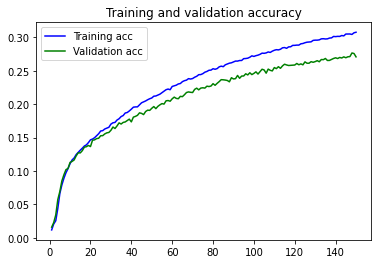

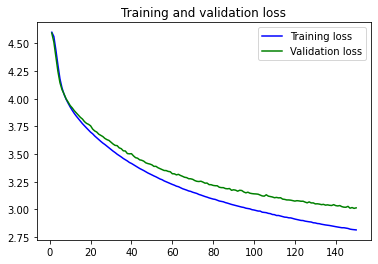

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
# Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 1s 3ms/step - loss: 2.9889 - acc: 0.2783
accuracy on test set: acc of 27.82999873161316


**SUMMARY** 
The simple CNN achieved

*   Training accuracy: 30.06
*   Validation accuracy:26.94
*   Testing accuracy: 27.8299







##3.2 Increased filters in CNN and increased conv layers in CNN 

For improving the model, I tried to increase number of filters in convolution layers and than also tried incresing number of convolution layers. Here I have also used early stoping so that I can monitor the improvement in the training phase and stop if it's not improving further. Because pervious, when I was experimenting, I observed that I trained a model for 300 epochs but the model was only improving till 50 t0 60 epoches and than the accuracy was saturated for rest of the epochs

#Early stopping:
Stop training when a monitored metric has stopped improving.

Assuming the goal of a training is to minimize the loss. With this, the metric to be monitored would be 'loss', and mode would be 'min'. A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.

The quantity to be monitored needs to be available in logs dict. To make it so, pass the loss or metrics at model.compile().

Reference: Keras official website

##Increasing the number of filters 

In [ ]:
# Build CNN model with increase of filters 
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

#simple early stopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
# Training model
history = model.fit(train_images, train_labels,
                    epochs=313,
                    validation_split=0.2, callbacks=[es]) # 20% of training set is used for validation

Epoch 1/313
1250/1250 [==============================] - 7s 5ms/step - loss: 4.1398 - acc: 0.0746 - val_loss: 3.8024 - val_acc: 0.1289
Epoch 2/313
1250/1250 [==============================] - 6s 5ms/step - loss: 3.6265 - acc: 0.1546 - val_loss: 3.5170 - val_acc: 0.1715
Epoch 3/313
1250/1250 [==============================] - 6s 5ms/step - loss: 3.3705 - acc: 0.2004 - val_loss: 3.3157 - val_acc: 0.2122
Epoch 4/313
1250/1250 [==============================] - 6s 5ms/step - loss: 3.1862 - acc: 0.2333 - val_loss: 3.1952 - val_acc: 0.2322
Epoch 5/313
1250/1250 [==============================] - 6s 5ms/step - loss: 3.0484 - acc: 0.2595 - val_loss: 3.1282 - val_acc: 0.2435
Epoch 6/313
1250/1250 [==============================] - 6s 5ms/step - loss: 2.9390 - acc: 0.2814 - val_loss: 3.0272 - val_acc: 0.2672
Epoch 7/313
1250/1250 [==============================] - 6s 5ms/step - loss: 2.8388 - acc: 0.3004 - val_loss: 2.9912 - val_acc: 0.2717
Epoch 8/313
1250/1250 [==============================] 

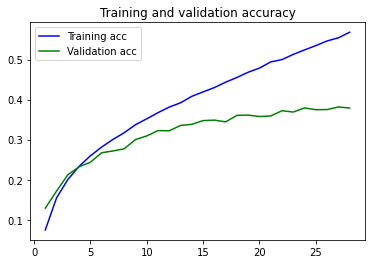

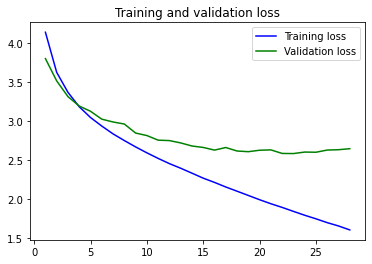

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
# Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 1s 4ms/step - loss: 2.5620 - acc: 0.3781
accuracy on test set: acc of 37.81000077724457


**SUMMARY**

with increasing the filters, the training accuracy is improved but the testing is almost same.

*   Training accuracy: 54.97
*   Validation accuracy: 37.17
*   Testing accuracy: 37.81

##Increasing of the convolution layers

In [ ]:
# Build CNN model with increase of convolution layers
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))


# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['acc'])

#simple early stopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=15, 
        verbose=1, mode='auto', restore_best_weights=True)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [ ]:
# Training model
history = model.fit(train_images, train_labels,
                    epochs=313,
                    validation_split=0.2, callbacks=[es]) # 20% of training set is used for validation

Epoch 1/313
1250/1250 [==============================] - 7s 5ms/step - loss: 4.0554 - acc: 0.0882 - val_loss: 3.6810 - val_acc: 0.1501
Epoch 2/313
1250/1250 [==============================] - 6s 5ms/step - loss: 3.5022 - acc: 0.1810 - val_loss: 3.4610 - val_acc: 0.1907
Epoch 3/313
1250/1250 [==============================] - 6s 5ms/step - loss: 3.2474 - acc: 0.2250 - val_loss: 3.3174 - val_acc: 0.2150
Epoch 4/313
1250/1250 [==============================] - 6s 5ms/step - loss: 3.0568 - acc: 0.2609 - val_loss: 3.1279 - val_acc: 0.2496
Epoch 5/313
1250/1250 [==============================] - 6s 5ms/step - loss: 2.8924 - acc: 0.2916 - val_loss: 3.0299 - val_acc: 0.2666
Epoch 6/313
1250/1250 [==============================] - 6s 5ms/step - loss: 2.7649 - acc: 0.3186 - val_loss: 2.9661 - val_acc: 0.2817
Epoch 7/313
1250/1250 [==============================] - 7s 5ms/step - loss: 2.6540 - acc: 0.3412 - val_loss: 2.8896 - val_acc: 0.2974
Epoch 8/313
1250/1250 [==============================] 

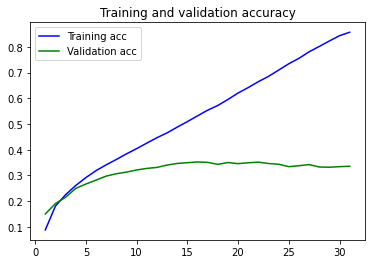

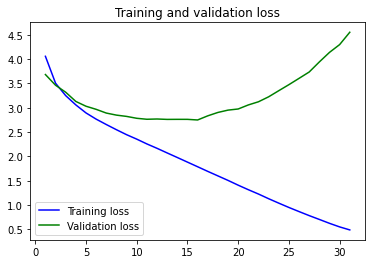

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
# Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 1s 4ms/step - loss: 2.7128 - acc: 0.3670
accuracy on test set: acc of 36.7000013589859


**SUMMARY** 

with increasing the convolution layers, the training accuracy is improved alot but the testing is degraded which is a clear evidence of overfitting.

*   Training accuracy: 82.62
*   Validation accuracy: 32.14
*   Testing accuracy: 36.700

##4 Learning Rate Adaptive Reduction and Data Augmentation to Prevent Overfitting



## 4.1 Simple model with ReduceLROnPlateau
**Simple CNN model with Learning Rate Adaptive Reduction:**
I had two option for reducing learning rate that are using pre-defined learning rate schedules or adaptive learning rate methods. The adaptive learning rate methods demonstrate better performance than learning rate schedules, and they require much less effort in hyperparamater settings. 

These per-parameter learning rate methods provide heuristic approach without requiring expensive work in tuning hyperparameters for the learning rate schedule manually.

Reference: https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/

**KERAS function:**

Reduce learning rate when a metric has stopped improving.

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
#model.compile(loss='categorical_crossentropy',
#              optimizer=optimizers.Adam(learning_rate=1e-4),
#              metrics=['acc'])



optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])



#simple early stopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

#learning_rate_reduction
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 64)          0         
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 64)         

In [ ]:
# Training model
history = model.fit(train_images, train_labels,
                    epochs=313,
                    validation_split=0.2, callbacks=[es, learning_rate_reduction]) # 20% of training set is used for validation

Epoch 1/313
1250/1250 [==============================] - 7s 5ms/step - loss: 4.0936 - accuracy: 0.0697 - val_loss: 3.7053 - val_accuracy: 0.1282 - lr: 0.0010
Epoch 2/313
1250/1250 [==============================] - 5s 4ms/step - loss: 3.5182 - accuracy: 0.1604 - val_loss: 3.3630 - val_accuracy: 0.1940 - lr: 0.0010
Epoch 3/313
1250/1250 [==============================] - 6s 5ms/step - loss: 3.2523 - accuracy: 0.2104 - val_loss: 3.2085 - val_accuracy: 0.2176 - lr: 0.0010
Epoch 4/313
1250/1250 [==============================] - 5s 4ms/step - loss: 3.0826 - accuracy: 0.2437 - val_loss: 3.0767 - val_accuracy: 0.2487 - lr: 0.0010
Epoch 5/313
1250/1250 [==============================] - 6s 5ms/step - loss: 2.9442 - accuracy: 0.2697 - val_loss: 2.9521 - val_accuracy: 0.2727 - lr: 0.0010
Epoch 6/313
1250/1250 [==============================] - 5s 4ms/step - loss: 2.8287 - accuracy: 0.2935 - val_loss: 2.8791 - val_accuracy: 0.2824 - lr: 0.0010
Epoch 7/313
1250/1250 [=============================

In [ ]:
# Plot function for visualisation training process
import matplotlib.pyplot as plt

def training_plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'b', label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

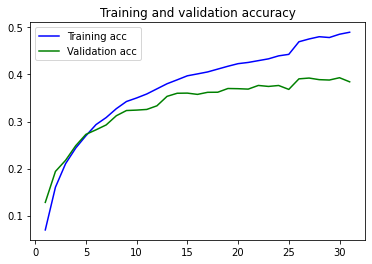

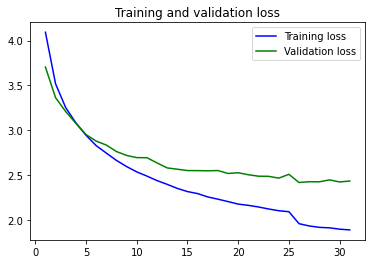

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
#Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 1s 3ms/step - loss: 2.3858 - accuracy: 0.3986
accuracy on test set: accuracy of 39.86000120639801


**Summary**

Here it can be observed that the difference between training and testing accuracy has reduced.


*   Training acc: 48.97
*   Val_acc: 38.44
*   test_acc: 39.86


## 4.2 Simple model with data augmentation 
The major problem with Cifar100 dataset is that we only have 600 images in each class i.e., we have a very limited dataset where as in Cifar10 there are 6000 images per class. That's why the performace of the models trained with cifar10 is much larger than cifar 100. 

In order to solve the problem of limited dataset, I can use data augmentation.Data augmentation is a technique to increase the variation in a dataset by applying transformations to the original data. It is often used when the training data is limited and as a way of preventing overfitting. Data augmentation is not only important when the training data is limited, but it can still give a boost in performance even when a lot of data is available.


In [ ]:
# Import datasets & libraries
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
import keras

In [ ]:
# Download dataset of CIFAR-100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Check the shape of the array
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of samples in dataset
print(f"Train: {x_train.shape[0]}")
print(f"Test: {x_test.shape[0]}")

# Data format
print(type(x_train))
print(type(y_train))

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Train: 50000
Test: 10000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Import libraries for preprocessing images
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

# Normalize images
train_images = x_train.astype('float32')/255
test_images = x_test.astype('float32')/255

# Transform labels to one hot encoding
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [ ]:
# Import Libraries for CNN
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout

from tensorflow.keras import layers

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
# Plot function for visualisation training process
import matplotlib.pyplot as plt

def training_plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'b', label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

In [ ]:
# Build CNN model
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# Add a classifier on top of CNN
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

# Configure the model for training
from tensorflow.keras import optimizers


optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])



#simple early stopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=15, 
        verbose=1, mode='auto', restore_best_weights=True)

#learning_rate_reduction
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=10, verbose=1, factor=0.5, min_lr=0.00001)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Configuration for creating new images
train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

#train_datagen = ImageDataGenerator(
#    rotation_range=20,
#    horizontal_flip=True,
#)

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
# Training model
import time
batch_size = 64
epochs = 400
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64), 
          epochs=400,
          validation_data=(X_validation, y_validation),
          verbose=1, steps_per_epoch=(X_train.shape[0] // batch_size), callbacks=[learning_rate_reduction,es])
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/400
625/625 [==============================] - 32s 33ms/step - loss: 4.0731 - accuracy: 0.0733 - val_loss: 3.7104 - val_accuracy: 0.1205 - lr: 0.0010
Epoch 2/400
625/625 [==============================] - 20s 33ms/step - loss: 3.6600 - accuracy: 0.1347 - val_loss: 3.4448 - val_accuracy: 0.1745 - lr: 0.0010
Epoch 3/400
625/625 [==============================] - 21s 33ms/step - loss: 3.4859 - accuracy: 0.1657 - val_loss: 3.2405 - val_accuracy: 0.2121 - lr: 0.0010
Epoch 4/400
625/625 [==============================] - 20s 32ms/step - loss: 3.3580 - accuracy: 0.1861 - val_loss: 3.1006 - val_accuracy: 0.2382 - lr: 0.0010
Epoch 5/400
625/625 [==============================] - 20s 32ms/step - loss: 3.2603 - accuracy: 0.2049 - val_loss: 3.0029 - val_accuracy: 0.2569 - lr: 0.0010
Epoch 6/400
625/625 [==============================] - 21s 33ms/step - loss: 3.1926 - accuracy: 0.2159 - val_loss: 3.0452 - val_accuracy: 0.2487 - lr: 0.0010
Epoch 7/400
625/625 [==============================]

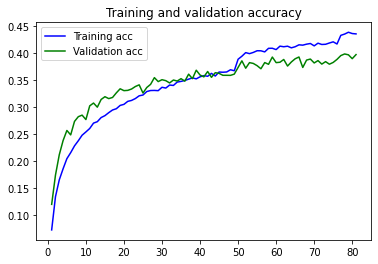

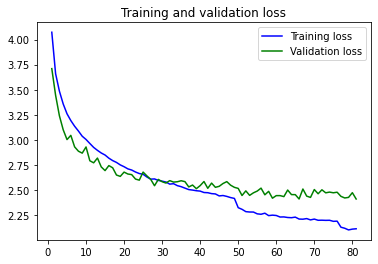

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
 #Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 1s 3ms/step - loss: 2.4050 - accuracy: 0.4002
accuracy on test set: accuracy of 40.02000093460083


**Summary**


1.   Training_acc= 43.52
2.   val_acc= 39.63
3.   testing_acc= 40.02



# 4.3 CNN increased layers and nodes + Dropout with Advanced data augmentation


In [ ]:
# CNN increased layers and nodes + Dropout with data augmentation

# Our input feature map is 64x64x3: 64x64 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(32, 32, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu', padding='same')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 128 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(128, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 256 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(256, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Add a dropout rate of 0.2
x = layers.Dropout(0.18)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)


# Create output layer with a single node and softmax activation
output = layers.Dense(100, activation='softmax')(x)

# Configure and compile the model
model = Model(img_input, output)

model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          18496 

In [ ]:

# Configure the model for training
from tensorflow.keras import optimizers


optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])



#simple early stopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=35, 
        verbose=1, mode='auto', restore_best_weights=True)

#learning_rate_reduction
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=25, verbose=1, factor=0.5, min_lr=0.00001)



###Data augmentation Cutout / Random Erasing
 
Cutout or Random Erasing is a kind of image augmentation methods for convolutional neural networks (CNN). They are very similar methods and were proposed almost at the same time. They try to regularize models using training images that are randomly masked with random values.

Reference:

[1] T. DeVries and G. W. Taylor, "Improved Regularization of Convolutional Neural Networks with Cutout," in arXiv:1708.04552, 2017.

[2] Z. Zhong, L. Zheng, G. Kang, S. Li, and Y. Yang, "Random Erasing Data Augmentation," in arXiv:1708.04896, 2017.




In [ ]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        if input_img.ndim == 3:
            img_h, img_w, img_c = input_img.shape
        elif input_img.ndim == 2:
            img_h, img_w = input_img.shape

        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            if input_img.ndim == 3:
                c = np.random.uniform(v_l, v_h, (h, w, img_c))
            if input_img.ndim == 2:
                c = np.random.uniform(v_l, v_h, (h, w))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w] = c

        return input_img

    return eraser

In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest', preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))



X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93, shuffle=True)
train_datagen.fit(X_train)


In [ ]:
# Training model
import time
batch_size = 64
epochs = 400
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64), 
          epochs=400,
          validation_data=(X_validation, y_validation),
          verbose=1, steps_per_epoch=(X_train.shape[0] // batch_size), callbacks=[learning_rate_reduction,es])
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")




Epoch 1/400
625/625 [==============================] - 24s 36ms/step - loss: 4.3017 - accuracy: 0.0345 - val_loss: 3.9954 - val_accuracy: 0.0643 - lr: 0.0010
Epoch 2/400
625/625 [==============================] - 22s 36ms/step - loss: 3.9129 - accuracy: 0.0825 - val_loss: 3.7378 - val_accuracy: 0.1109 - lr: 0.0010
Epoch 3/400
625/625 [==============================] - 22s 35ms/step - loss: 3.7214 - accuracy: 0.1138 - val_loss: 3.5565 - val_accuracy: 0.1461 - lr: 0.0010
Epoch 4/400
625/625 [==============================] - 22s 36ms/step - loss: 3.6062 - accuracy: 0.1363 - val_loss: 3.4761 - val_accuracy: 0.1607 - lr: 0.0010
Epoch 5/400
625/625 [==============================] - 22s 35ms/step - loss: 3.5288 - accuracy: 0.1473 - val_loss: 3.3455 - val_accuracy: 0.1831 - lr: 0.0010
Epoch 6/400
625/625 [==============================] - 22s 36ms/step - loss: 3.4628 - accuracy: 0.1608 - val_loss: 3.3055 - val_accuracy: 0.1911 - lr: 0.0010
Epoch 7/400
625/625 [==============================]

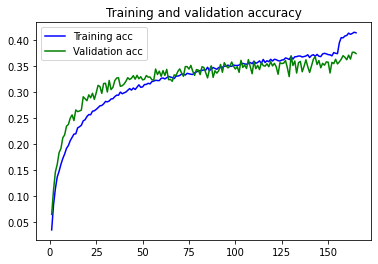

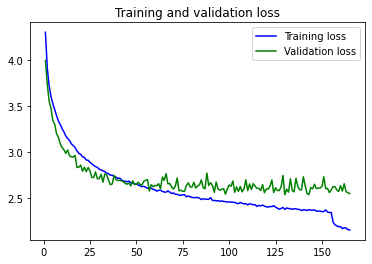

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
#Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 1s 3ms/step - loss: 2.5372 - accuracy: 0.3622
accuracy on test set: accuracy of 36.2199991941452


**SUMMARY**

with increasing the filters, the training accuracy is improved but the testing is almost same.

*   Training accuracy: 41.36
*   Validation accuracy: 37.37
*   Testing accuracy: 36.22

# 5 BatchNormalization with dropout and data augmentation

In [ ]:
# Batch norm model 3
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()
 
model.add(Conv2D(128,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))
model.summary()

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 32, 32, 128)      

In [ ]:
# Configure the model for training
from tensorflow.keras import optimizers


optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])



#simple early stopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, 
        verbose=1, mode='auto', restore_best_weights=True)

#learning_rate_reduction
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.00001)


In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest',preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))



X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(X_train)

In [ ]:
import time
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
          steps_per_epoch=100, 
          epochs=350,
          validation_data=(X_validation, y_validation),
          verbose=1, callbacks=[learning_rate_reduction, es])
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/350
100/100 [==============================] - 19s 75ms/step - loss: 4.5124 - accuracy: 0.0364 - val_loss: 4.7886 - val_accuracy: 0.0116 - lr: 0.0010
Epoch 2/350
100/100 [==============================] - 6s 63ms/step - loss: 4.2006 - accuracy: 0.0613 - val_loss: 5.0873 - val_accuracy: 0.0121 - lr: 0.0010
Epoch 3/350
100/100 [==============================] - 7s 70ms/step - loss: 4.0857 - accuracy: 0.0773 - val_loss: 4.9872 - val_accuracy: 0.0144 - lr: 0.0010
Epoch 4/350
100/100 [==============================] - 6s 63ms/step - loss: 4.0039 - accuracy: 0.0886 - val_loss: 4.7676 - val_accuracy: 0.0388 - lr: 0.0010
Epoch 5/350
100/100 [==============================] - 6s 63ms/step - loss: 3.9212 - accuracy: 0.0978 - val_loss: 4.0729 - val_accuracy: 0.0802 - lr: 0.0010
Epoch 6/350
100/100 [==============================] - 6s 64ms/step - loss: 3.8279 - accuracy: 0.1056 - val_loss: 3.8842 - val_accuracy: 0.1111 - lr: 0.0010
Epoch 7/350
100/100 [==============================] - 7s

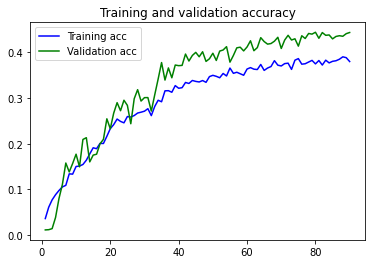

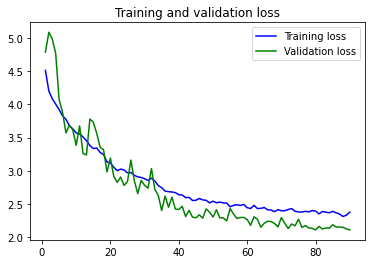

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
#Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 2s 7ms/step - loss: 2.0980 - accuracy: 0.4427
accuracy on test set: accuracy of 44.269999861717224


**SUMMARY**

Adding batchNormalization with dropout and data augmentation:
*   Training accuracy: 37.98
*   Validation accuracy: 44.33
*   Testing accuracy: 44.26

Here my validation accuracy is higher than training, so I tried to resolve this in the next model.

#Best Model with the techniques used in above experiments

In [ ]:
# Batch norm model type 2
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()
 
model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

In [ ]:
# Configure the model for training
from tensorflow.keras import optimizers


optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])



#simple early stopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, 
        verbose=1, mode='auto', restore_best_weights=True)

#learning_rate_reduction
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=15, verbose=1, factor=0.5, min_lr=0.00001)


In [ ]:
# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest', preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=False))



X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=1)
train_datagen.fit(X_train)
# Training model
import time
batch_size = 64
epochs = 400
training_start = time.time()
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=64), 
          epochs=400,
          validation_data=(X_validation, y_validation),
          verbose=1, steps_per_epoch=(X_train.shape[0] // batch_size), callbacks=[learning_rate_reduction,es])
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")


Epoch 1/400
625/625 [==============================] - 78s 101ms/step - loss: 4.2784 - accuracy: 0.0523 - val_loss: 3.9224 - val_accuracy: 0.0966 - lr: 0.0010
Epoch 2/400
625/625 [==============================] - 62s 99ms/step - loss: 3.8707 - accuracy: 0.0987 - val_loss: 3.9839 - val_accuracy: 0.1216 - lr: 0.0010
Epoch 3/400
625/625 [==============================] - 69s 111ms/step - loss: 3.5947 - accuracy: 0.1412 - val_loss: 3.4798 - val_accuracy: 0.1640 - lr: 0.0010
Epoch 4/400
625/625 [==============================] - 64s 102ms/step - loss: 3.3648 - accuracy: 0.1793 - val_loss: 3.3415 - val_accuracy: 0.1982 - lr: 0.0010
Epoch 5/400
625/625 [==============================] - 70s 111ms/step - loss: 3.1733 - accuracy: 0.2123 - val_loss: 3.4050 - val_accuracy: 0.1974 - lr: 0.0010
Epoch 6/400
625/625 [==============================] - 65s 104ms/step - loss: 3.0029 - accuracy: 0.2421 - val_loss: 2.8684 - val_accuracy: 0.2738 - lr: 0.0010
Epoch 7/400
625/625 [==========================

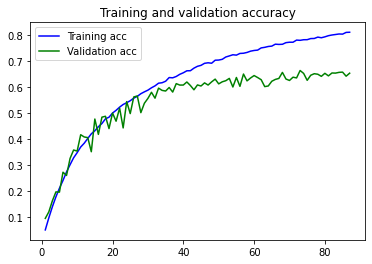

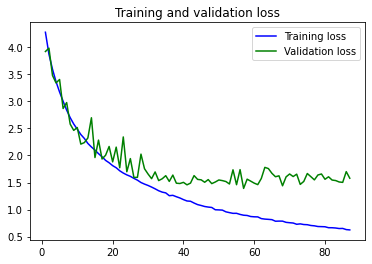

In [ ]:
# Visualize training process
training_plot(history)

In [ ]:
#Test Accuracy on test set
scores = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {scores[1]*100}')

313/313 [==============================] - 6s 18ms/step - loss: 1.3779 - accuracy: 0.6542
accuracy on test set: accuracy of 65.420001745224


This CNN model in Keras without transfer learning achieves 65.16% accuracy on test set of CIFAR-100 which is close to ResNet50.

*   Training accuracy: 90.24
*   Validation accuracy: 65.40 
*   Testing accuracy: 65.16

In [ ]:
from google.colab import drive

ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [ ]:
!pwd
model.save('Baseline65%_accuracy_on_test.h5')

/content


In [ ]:
from keras.models import load_model
model = load_model('Baseline65%_accuracy_on_test.h5')

In [ ]:
# Translate categorial to array for drawing confusion matrix
from sklearn.metrics import confusion_matrix
from numpy import argmax
prediction = []
true_labels = []

pred = model.predict(test_images)
print(test_labels.shape[0])
for i in range(test_labels.shape[0]):
  prediction.append(argmax(pred[i]))
  true_labels.append(argmax(test_labels[i]))

cm = confusion_matrix(prediction, true_labels)

10000


In [ ]:
# Name of all classes in CIFAR-100
classes = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 
'aquarium' ,'fish', 'ray', 'shark', 'trout', 
'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', 
'bottles', 'bowls', 'cans', 'cups', 'plates', 
'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 
'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 
'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 
'bear', 'leopard', 'lion', 'tiger', 'wolf', 
'bridge', 'castle', 'house', 'road', 'skyscraper', 
'cloud', 'forest', 'mountain', 'plain', 'sea', 
'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 
'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 
'crab', 'lobster', 'snail', 'spider', 'worm', 
'baby', 'boy', 'girl', 'man', 'woman', 
'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 
'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 
'maple', 'oak', 'palm', 'pine', 'willow', 
'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 
'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

[[94  0  0 ...  0  1  0]
 [ 0 79  0 ...  0  1  0]
 [ 0  0 65 ...  0  4  0]
 ...
 [ 0  0  0 ... 77  0  0]
 [ 0  0  1 ...  0 45  0]
 [ 0  0  0 ...  0  0 66]]


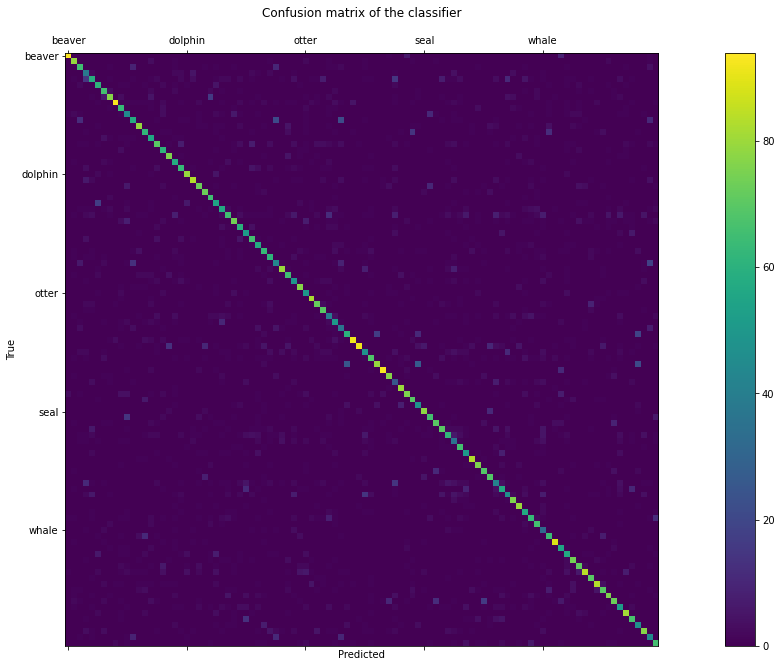

In [ ]:
# Plot the confusion matrix
import matplotlib.pyplot as plt
print(cm)
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(211)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + classes)
ax.set_yticklabels([''] + classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Calculating f1 score
from sklearn.metrics import f1_score
print(f"f1 score: {f1_score(true_labels, prediction, average='weighted')}")

f1 score: 0.6548573021805395


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, prediction, target_names=classes, digits=5))

                   precision    recall  f1-score   support

           beaver    0.84685   0.94000   0.89100       100
          dolphin    0.84946   0.79000   0.81865       100
            otter    0.63725   0.65000   0.64356       100
             seal    0.59375   0.38000   0.46341       100
            whale    0.35976   0.59000   0.44697       100
         aquarium    0.72619   0.61000   0.66304       100
             fish    0.76744   0.66000   0.70968       100
              ray    0.59231   0.77000   0.66957       100
            shark    0.66906   0.93000   0.77824       100
            trout    0.75904   0.63000   0.68852       100
          orchids    0.50000   0.45000   0.47368       100
          poppies    0.42963   0.58000   0.49362       100
            roses    0.71171   0.79000   0.74882       100
       sunflowers    0.57944   0.62000   0.59903       100
           tulips    0.77778   0.56000   0.65116       100
          bottles    0.52239   0.70000   0.59829       

#Plese refer to notebook2 for second part of project which is based on the methods of tranfer learning.